Давайте познакомимся с одним из способов выделения трендовой и сезонной компонент ряда и визуального анализа шума.

In [3]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 330.3 kB/s eta 0:00:30
   ---------------------------------------- 0.1/9.9 MB 409.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/9.9 MB 435.7 kB/s eta 0:00:23
    --------------------------------------- 0.1/9.9 MB 607.9 kB/s eta 0:00:16
    --------------------------------------- 0.2/9.9 MB 860.2 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.9 MB 860.2 kB/s eta 0:00:12
   - -------------------------------------- 0.3/9.9 MB 855.7 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.9 MB 933.2 kB/s eta 0:00:11
   - -------------------------------------- 0.5/9.9 MB 1.0 MB/s eta 0:00:10
   -- ------------------------------------- 0.5/9.9 MB 1.0 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/9.9 MB 1.0 MB/s eta 0:00:09
   -- ----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

df = pd.read_csv('AirPassengers.csv') # считываем датасет
df.columns = (['Month','Pass']) # заменяем название столбца '#Passenger' на 'Pass' чтобы избежать путаницы с комментариями
df.head() # смотрим на первые несколько строчек

,Month,Pass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
df = df.set_index(pd.DatetimeIndex(df['Month'])) 
df.head() # смотрим на результат

,Month,Pass
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [11]:
 # замечаем, что т.к. у нас теперь есть индекс Month, нам больше не нужен столбец Month, который его дублирует
df.drop(['Month'], axis = 1, inplace = True)
df.head() # снова проверяем, что все в порядке. вообще проверять данные на каждом шаге кода - хорошая привычка

,Pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


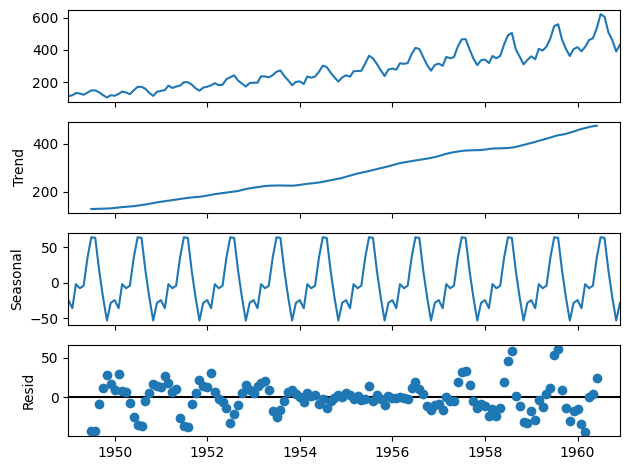

In [12]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом

In [13]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [14]:
# посмотрим повнимательнее на остатки в начале ряда
residual_part.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: resid, dtype: float64

In [15]:
# посмотрим повнимательнее на остатки в конце ряда
residual_part.tail()

Month
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, dtype: float64

In [16]:
# в конце и в начале стоят значения NaN. Это связано с особенностями алгоритма seasonal_decompose
# если мы хотим далее анализировать остатки, необходимо избавиться от этих некорректных значений
residual_part = residual_part.dropna()
residual_part.head()

Month
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
Name: resid, dtype: float64

Анализ результата:

В ряде явно присутствует тренд на рост и ярко выражена годовая сезонность

Остатки ряда не похожи не хаотичный белый шум и скорее всего все еще содержат закономерности

# 7.8. Практика. Тренд и сезонность

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

df = pd.read_csv('candy_production.csv') # считываем датасет
df.columns = (['Month','Pass']) # заменяем название столбца '#Passenger' на 'Pass' чтобы избежать путаницы с комментариями
df.head() # смотрим на первые несколько строчек

,Month,Pass
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [19]:
df.count()

Month    548
Pass     548
dtype: int64

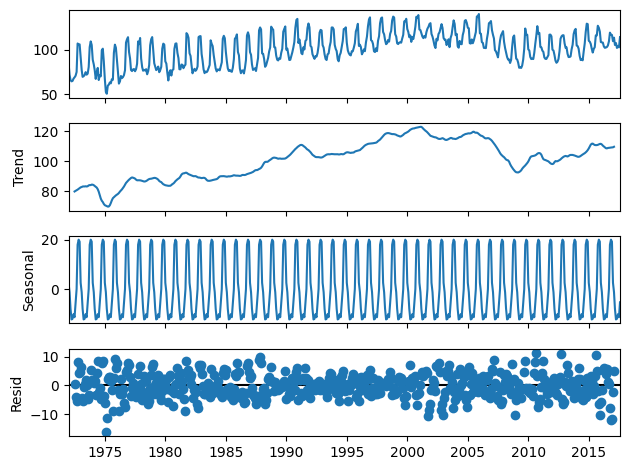

In [27]:
# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
df = df.set_index(pd.DatetimeIndex(df['Month'])) 


 # замечаем, что т.к. у нас теперь есть индекс Month, нам больше не нужен столбец Month, который его дублирует
df.drop(['Month'], axis = 1, inplace = True)



# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом




In [28]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [31]:
residual_part

Month
1972-01-01   NaN
1972-02-01   NaN
1972-03-01   NaN
1972-04-01   NaN
1972-05-01   NaN
              ..
2017-04-01   NaN
2017-05-01   NaN
2017-06-01   NaN
2017-07-01   NaN
2017-08-01   NaN
Name: resid, Length: 548, dtype: float64

In [32]:
# в конце и в начале стоят значения NaN. Это связано с особенностями алгоритма seasonal_decompose
# если мы хотим далее анализировать остатки, необходимо избавиться от этих некорректных значений
_seasonal_part = seasonal_part.dropna()
_seasonal_part.count()

548